In [10]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
# 와인 데이터를 로드한다.
wine = load_wine()
df_features = wine.feature_names

In [11]:
df_data = pd.DataFrame(wine.data, columns = df_features)
df_labels = pd.DataFrame(wine.target, columns = ['label'])
df_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [12]:
data=pd.concat([df_data,df_labels],axis=1)
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [14]:
n_features = 1

X = data.iloc[:,0:13].values
#Splitting the data into training and test test
X = X.reshape((X.shape[0], X.shape[1], n_features))
y = data.iloc[:,13].values
from sklearn.preprocessing import LabelEncoder

encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 
X

array([[[1.423e+01],
        [1.710e+00],
        [2.430e+00],
        ...,
        [1.040e+00],
        [3.920e+00],
        [1.065e+03]],

       [[1.320e+01],
        [1.780e+00],
        [2.140e+00],
        ...,
        [1.050e+00],
        [3.400e+00],
        [1.050e+03]],

       [[1.316e+01],
        [2.360e+00],
        [2.670e+00],
        ...,
        [1.030e+00],
        [3.170e+00],
        [1.185e+03]],

       ...,

       [[1.327e+01],
        [4.280e+00],
        [2.260e+00],
        ...,
        [5.900e-01],
        [1.560e+00],
        [8.350e+02]],

       [[1.317e+01],
        [2.590e+00],
        [2.370e+00],
        ...,
        [6.000e-01],
        [1.620e+00],
        [8.400e+02]],

       [[1.413e+01],
        [4.100e+00],
        [2.740e+00],
        ...,
        [6.100e-01],
        [1.600e+00],
        [5.600e+02]]])

In [5]:
X.shape

(178, 13)

In [6]:
 Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1,

In [15]:
n_steps = X.shape[1]
n_steps

13

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD,Adam
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [17]:
model =Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

print("input_shape => ", n_steps, n_features)
model.summary()   

input_shape =>  13 1
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 12, 64)            192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 6, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense (Dense)               (None, 50)                19250     
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 3)                 153       
                                 

C:\anaconda\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [18]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=16,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
9/9 [==============================] - 1s 32ms/step - loss: 24.9706 - accuracy: 0.2887 - val_loss: 20.8063 - val_accuracy: 0.1667
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 7.0169 - accuracy: 0.3944 - val_loss: 2.9337 - val_accuracy: 0.4444
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 1.7171 - accuracy: 0.4859 - val_loss: 0.7367 - val_accuracy: 0.6111
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.7973 - accuracy: 0.5493 - val_loss: 0.8715 - val_accuracy: 0.5000
Epoch 5/100
9/9 [==============================] - 0s 5ms/step - loss: 0.7578 - accuracy: 0.6479 - val_loss: 0.5393 - val_accuracy: 0.7778
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6258 - accuracy: 0.6972 - val_loss: 0.4889 - val_accuracy: 0.8056
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.6247 - accuracy: 0.7535 - val_loss: 0.3978 - val_accuracy: 0.8611
Epoch 8/100
9/9 [=======

9/9 [==============================] - 0s 5ms/step - loss: 0.1059 - accuracy: 0.9718 - val_loss: 0.2938 - val_accuracy: 0.8889
Epoch 60/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1924 - accuracy: 0.9085 - val_loss: 0.3498 - val_accuracy: 0.7778
Epoch 61/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1564 - accuracy: 0.9225 - val_loss: 0.2706 - val_accuracy: 0.8889
Epoch 62/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1395 - accuracy: 0.9366 - val_loss: 0.1197 - val_accuracy: 0.9722
Epoch 63/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0977 - accuracy: 0.9718 - val_loss: 0.1622 - val_accuracy: 0.9444
Epoch 64/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1728 - accuracy: 0.9225 - val_loss: 0.2007 - val_accuracy: 0.9444
Epoch 65/100
9/9 [==============================] - 0s 5ms/step - loss: 0.1670 - accuracy: 0.9225 - val_loss: 0.1522 - val_accuracy: 0.9444
Epoch 66/100
9/9 [===============

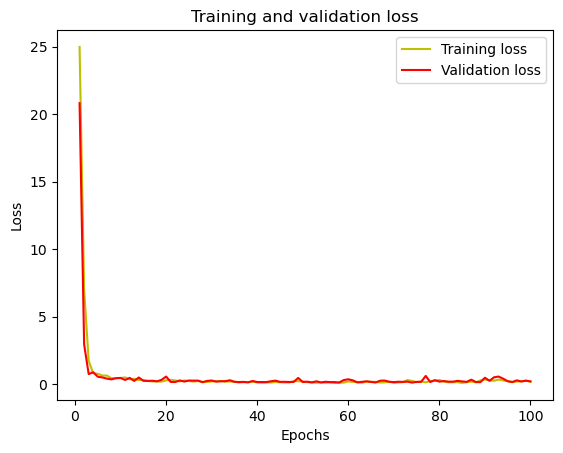

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

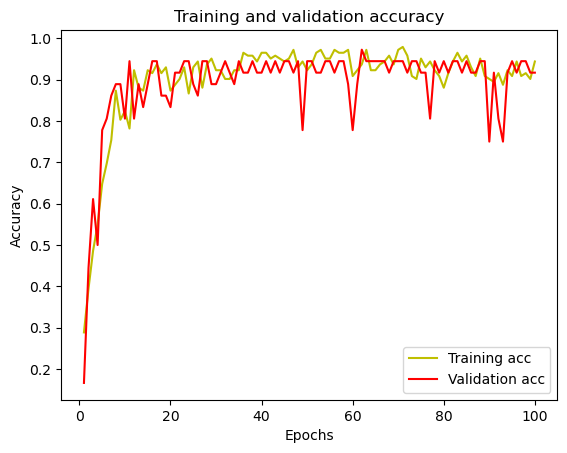

In [20]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))